In [1]:
import pandas as pd
import numpy as np

In [2]:
X=pd.read_csv("C:/Users/jaska/OneDrive/Desktop/VS_Code_Program/Python/Datasets/indian_engineering_student_placement.csv")

In [3]:
X.head()

,Student_ID,gender,branch,cgpa,tenth_percentage,twelfth_percentage,backlogs,study_hours_per_day,attendance_percentage,projects_completed,...,aptitude_skill_rating,hackathons_participated,certifications_count,sleep_hours,stress_level,part_time_job,family_income_level,city_tier,internet_access,extracurricular_involvement
0,1,Male,ECE,8.74,74.0,75.0,0,3.8,71.1,7,...,5,4,5,6.5,8,Yes,Medium,Tier 2,Yes,Medium
1,2,Female,ECE,7.80,75.3,69.7,0,6.3,69.5,5,...,3,4,1,7.1,8,Yes,Medium,Tier 3,Yes,Low
2,3,Female,IT,6.95,62.8,68.3,0,1.5,62.5,8,...,4,6,3,6.1,2,No,Low,Tier 2,Yes,High
3,4,Male,ECE,7.46,57.9,51.4,1,4.7,64.6,6,...,4,2,2,7.3,7,No,Medium,Tier 1,Yes,Low
4,5,Male,IT,6.86,61.3,73.5,2,5.2,75.9,3,...,3,2,1,6.0,7,No,Medium,Tier 1,Yes,Medium


In [4]:
X=X.drop(["Student_ID","extracurricular_involvement"],axis=1)

In [5]:
X.head()

,gender,branch,cgpa,tenth_percentage,twelfth_percentage,backlogs,study_hours_per_day,attendance_percentage,projects_completed,internships_completed,...,communication_skill_rating,aptitude_skill_rating,hackathons_participated,certifications_count,sleep_hours,stress_level,part_time_job,family_income_level,city_tier,internet_access
0,Male,ECE,8.74,74.0,75.0,0,3.8,71.1,7,3,...,2,5,4,5,6.5,8,Yes,Medium,Tier 2,Yes
1,Female,ECE,7.80,75.3,69.7,0,6.3,69.5,5,1,...,4,3,4,1,7.1,8,Yes,Medium,Tier 3,Yes
2,Female,IT,6.95,62.8,68.3,0,1.5,62.5,8,2,...,1,4,6,3,6.1,2,No,Low,Tier 2,Yes
3,Male,ECE,7.46,57.9,51.4,1,4.7,64.6,6,2,...,1,4,2,2,7.3,7,No,Medium,Tier 1,Yes
4,Male,IT,6.86,61.3,73.5,2,5.2,75.9,3,3,...,5,3,2,1,6.0,7,No,Medium,Tier 1,Yes


In [6]:
y=pd.read_csv("C:/Users/jaska/OneDrive/Desktop/VS_Code_Program/Python/Datasets/placement_targets_for_student_placement.csv")

In [7]:
y=y.drop(["Student_ID"],axis=1)

In [8]:
y["placement_status"].value_counts()

placement_status
Placed        4303
Not Placed     697
Name: count, dtype: int64

TRAIN TEST SPLIT

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

Applying One Hot Encoder, Ordinal Encoder and Standard Scaler 

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

ct_1=ColumnTransformer(transformers=[
    ("SS",StandardScaler(),['cgpa', 'tenth_percentage', 'twelfth_percentage', 'backlogs',
       'study_hours_per_day', 'attendance_percentage', 'projects_completed',
       'internships_completed', 'coding_skill_rating',
       'communication_skill_rating', 'aptitude_skill_rating',
       'hackathons_participated', 'certifications_count', 'sleep_hours',
       'stress_level']),
    ("OHE",OneHotEncoder(drop="first"),["gender","branch","family_income_level","city_tier"]),
    ("OE",OrdinalEncoder(categories=[["No","Yes"],["Yes","No"]]),["part_time_job","internet_access"])
],remainder="passthrough")

ct_2=ColumnTransformer(transformers=[
    ("SS",StandardScaler(),["salary_lpa"]),
    ("OE",OrdinalEncoder(categories=[["Not Placed","Placed"]]),["placement_status"])
],remainder="passthrough")

In [11]:
X_train_ct=ct_1.fit_transform(X_train)
X_test_ct=ct_1.transform(X_test)

y_train_ct=ct_2.fit_transform(y_train)
y_test_ct=ct_2.transform(y_test)

In [12]:
X_train_ct=pd.DataFrame(X_train_ct,columns=[name.split("__")[-1] for name in ct_1.get_feature_names_out()])
X_test_ct=pd.DataFrame(X_test_ct,columns=[name.split("__")[-1] for name in ct_1.get_feature_names_out()])

y_train_ct=pd.DataFrame(y_train_ct,columns=[name.split("__")[-1] for name in ct_2.get_feature_names_out()])
y_test_ct=pd.DataFrame(y_test_ct,columns=[name.split("__")[-1] for name in ct_2.get_feature_names_out()])

In [13]:
X_train_ct.head()

,cgpa,tenth_percentage,twelfth_percentage,backlogs,study_hours_per_day,attendance_percentage,projects_completed,internships_completed,coding_skill_rating,communication_skill_rating,...,branch_CSE,branch_ECE,branch_IT,branch_ME,family_income_level_Low,family_income_level_Medium,city_tier_Tier 2,city_tier_Tier 3,part_time_job,internet_access
0,-0.918712,-0.507010,-0.413316,1.123690,-0.174680,-0.471312,0.717691,-1.868499,1.001293,-0.003237,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.205904,1.197899,0.030043,1.123690,1.962841,0.909031,-1.236096,-0.129174,-2.141497,-0.003237,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.099572,0.012301,0.118715,-0.561171,0.385147,-0.613216,1.206138,-0.129174,1.001293,0.710713,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.045244,0.815764,-0.452726,-0.561171,-1.752373,-2.264468,1.206138,0.740489,1.001293,0.710713,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.255992,-0.105278,-0.255677,1.123690,-0.887186,-1.309838,-0.259202,-0.129174,0.215595,1.424663,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


Training Model with Linear Regression and Logistc Regression

In [14]:
from sklearn.linear_model import LinearRegression,LogisticRegression

lir=LinearRegression()
lor=LogisticRegression()

In [15]:
lir.fit(X_train_ct,y_train_ct["salary_lpa"])
pred_1_lir=lir.predict(X_test_ct)

lor.fit(X_train_ct,y_train_ct["placement_status"])
pred_2_lor=lor.predict(X_test_ct)

Metric Evaluation

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import recall_score,accuracy_score,f1_score,precision_score,confusion_matrix,ConfusionMatrixDisplay

In [17]:
print("Mean Square Error : ",mean_squared_error(y_test_ct["salary_lpa"],pred_1_lir))
print("Mean Absolute Error : ",mean_absolute_error(y_test_ct["salary_lpa"],pred_1_lir))
print("R2 Score : ",r2_score(y_test_ct["salary_lpa"],pred_1_lir))

Mean Square Error :  0.4000974804657622
Mean Absolute Error :  0.4538735226652996
R2 Score :  0.5885798179625734


In [18]:
print("Accuracy : ",accuracy_score(y_test_ct["placement_status"],pred_2_lor))
print("Precision : ",precision_score(y_test_ct["placement_status"],pred_2_lor))
print("F1 Score : ",f1_score(y_test_ct["placement_status"],pred_2_lor))
print("Recall : ",recall_score(y_test_ct["placement_status"],pred_2_lor))

Accuracy :  0.8896
Precision :  0.9162257495590829
F1 Score :  0.9377256317689531
Recall :  0.9602587800369686


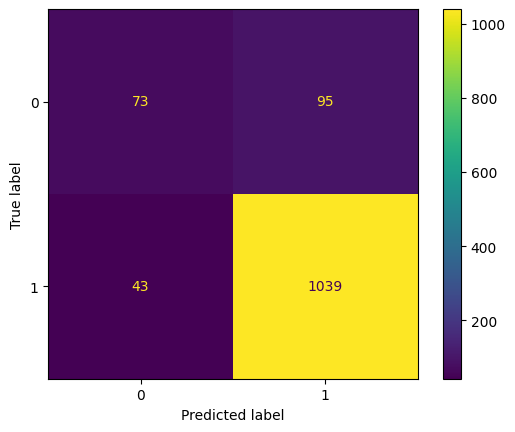

In [19]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test_ct["placement_status"],pred_2_lor))
cm.plot()

NOW APPLYING PCA (PRINCIPAL COMPONENT ANALYSIS)

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

X_train_pca=pca.fit_transform(X_train_ct)
X_test_pca=pca.transform(X_test_ct)

In [21]:
pca.explained_variance_ratio_

array([0.24551599, 0.14397713])

In [22]:
pca.explained_variance_

array([4.20077002, 2.46344364])

In [23]:
X_train_pca.shape

(3750, 2)

In [24]:
lir.fit(X_train_pca,y_train_ct["salary_lpa"])
pred_1_pca=lir.predict(X_test_pca)

lor.fit(X_train_pca,y_train_ct["placement_status"])
pred_2_pca=lor.predict(X_test_pca)

In [25]:
print("Mean Square Error : ",mean_squared_error(y_test_ct["salary_lpa"],pred_1_pca))
print("Mean Absolute Error : ",mean_absolute_error(y_test_ct["salary_lpa"],pred_1_pca))
print("R2 Score : ",r2_score(y_test_ct["salary_lpa"],pred_1_pca))

Mean Square Error :  0.5160289533112574
Mean Absolute Error :  0.5140103338521858
R2 Score :  0.46936750098813007


In [26]:
print("Accuracy : ",accuracy_score(y_test_ct["placement_status"],pred_2_pca))
print("Precision : ",precision_score(y_test_ct["placement_status"],pred_2_pca))
print("F1 Score : ",f1_score(y_test_ct["placement_status"],pred_2_pca))
print("Recall : ",recall_score(y_test_ct["placement_status"],pred_2_pca))

Accuracy :  0.8736
Precision :  0.893526405451448
F1 Score :  0.9299645390070922
Recall :  0.9695009242144177


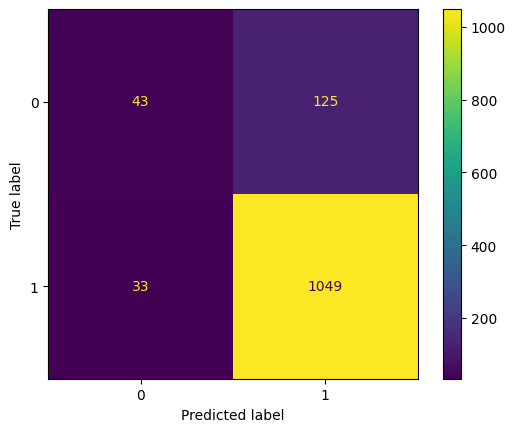

In [27]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test_ct["placement_status"],pred_2_pca))
cm.plot()

USING SUPPORT VETCOR MACHINE

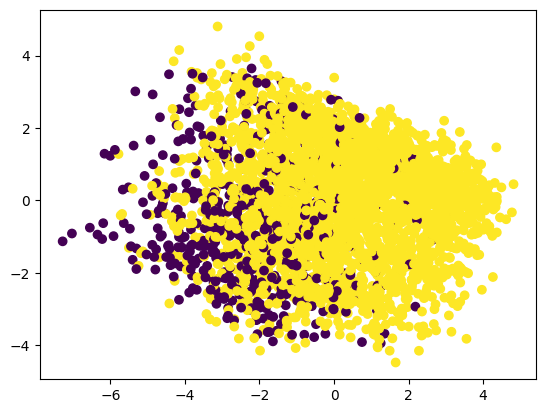

In [28]:
import matplotlib.pyplot as plt

plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train_ct["placement_status"])

In [29]:
from sklearn.svm import SVC

svc_lin=SVC(kernel="linear")

svc_lin.fit(X_train_pca,y_train_ct["placement_status"])
pred_svc_lin=svc_lin.predict(X_test_pca)

In [30]:
print("Accuracy : ",accuracy_score(y_test_ct["placement_status"],pred_svc_lin))

Accuracy :  0.8656


In [31]:
svc_rbf=SVC(kernel="rbf")

svc_rbf.fit(X_train_pca,y_train_ct["placement_status"])
pred_svc_rbf=svc_rbf.predict(X_test_pca)

In [32]:
print("Accuracy : ",accuracy_score(y_test_ct["placement_status"],pred_svc_rbf))

Accuracy :  0.8728


In [33]:
svc_poly=SVC(kernel="poly",degree=5)

svc_poly.fit(X_train_pca,y_train_ct["placement_status"])
pred_svc_poly=svc_poly.predict(X_test_pca)

In [34]:
print("Accuracy : ",accuracy_score(y_test_ct["placement_status"],pred_svc_poly))

Accuracy :  0.8712


K-Nearest Neighbour Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)

In [36]:
knn.fit(X_train_ct,y_train_ct["placement_status"])
pred_ct_knn=knn.predict(X_test_ct)

In [37]:
print("Accuracy : ",accuracy_score(y_test_ct["placement_status"],pred_ct_knn))

Accuracy :  0.8728


In [38]:
knn.fit(X_train_pca,y_train_ct["placement_status"])
pred_pca_knn=knn.predict(X_test_pca)

In [39]:
print("Accuracy : ",accuracy_score(y_test_ct["placement_status"],pred_pca_knn))

Accuracy :  0.8416
